### Imports

In [1]:
%matplotlib inline
from pathlib import Path
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import xarray as xr
import gsw
import cmocean

import gvpy as gv

import niskine

%config InlineBackend.figure_format = 'retina'

%reload_ext autoreload
%autoreload 2
%autosave 300

Autosaving every 300 seconds


Load configuration from `config.yml` in the root directory. `io.load_config()` automatically detects the root directory and adjusts the paths.

In [2]:
config = niskine.io.load_config()

Print the config.

In [3]:
niskine.io.print_config(print_values=True)

path
   data
      /Users/gunnar/Projects/niskine/niskine/data
   fig
      /Users/gunnar/Projects/niskine/niskine/fig
   root
      /Users/gunnar/Projects/niskine/niskine
data
   proc
      adcp
         /Users/gunnar/Projects/niskine/niskine/data/proc/adcp


# M1

After copying or linking the processed M1 ADCP netcdf files into `data/proc/adcp` we can list and then read them.

In [4]:
m1_files = sorted(config.data.proc.adcp.glob('*.nc'))

Let's look at only one ADCP file for now.

In [5]:
adcp = xr.open_dataset(m1_files[0])

In [6]:
adcp

<xarray.Dataset>
Dimensions:       (z: 75, time: 23031)
Coordinates:
  * time          (time) datetime64[ns] 2019-05-13T00:00:14.999866 ... 2020-1...
  * z             (z) float64 800.0 816.0 832.0 ... 1.968e+03 1.984e+03
Data variables: (12/15)
    pg            (z, time) int8 ...
    u             (z, time) float32 ...
    v             (z, time) float32 ...
    w             (z, time) float32 ...
    e             (z, time) float32 ...
    u_std         (z, time) float32 ...
    ...            ...
    amp           (z, time) float32 ...
    temperature   (time) float32 ...
    pressure      (time) float32 ...
    pressure_std  (time) float32 ...
    pressure_max  (time) float32 ...
    npings        (time) int16 ...
Attributes:
    orientation:      down
    magdec:           -10.915967
    max_e:            0.2
    max_e_deviation:  2
    min_correlation:  64
    mooring:          M1
    sn:               13481
    project:          NISKINe
    Bin1Dist:         24.59
    NCells:           44
    CellSize:         16.0
    proc time:        2022-03-15T01:31:53

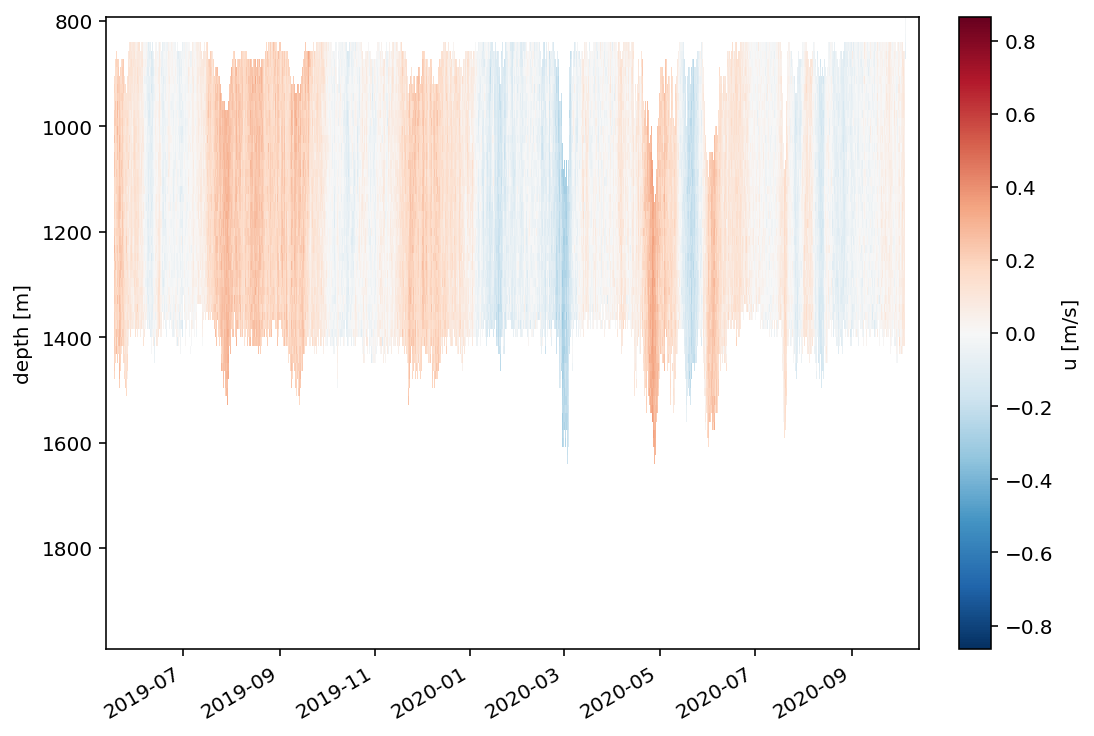

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 5),
                       constrained_layout=True)
adcp.u.plot(ax=ax)
ax.set(xlabel='')
ax.invert_yaxis()

Extract numpy arrays and make a plot without xarray.

In [12]:
u = adcp.u.data
time = adcp.time.data
z = adcp.z.data

In [11]:
u.shape

(75, 23031)

[(1700.0, 800.0)]

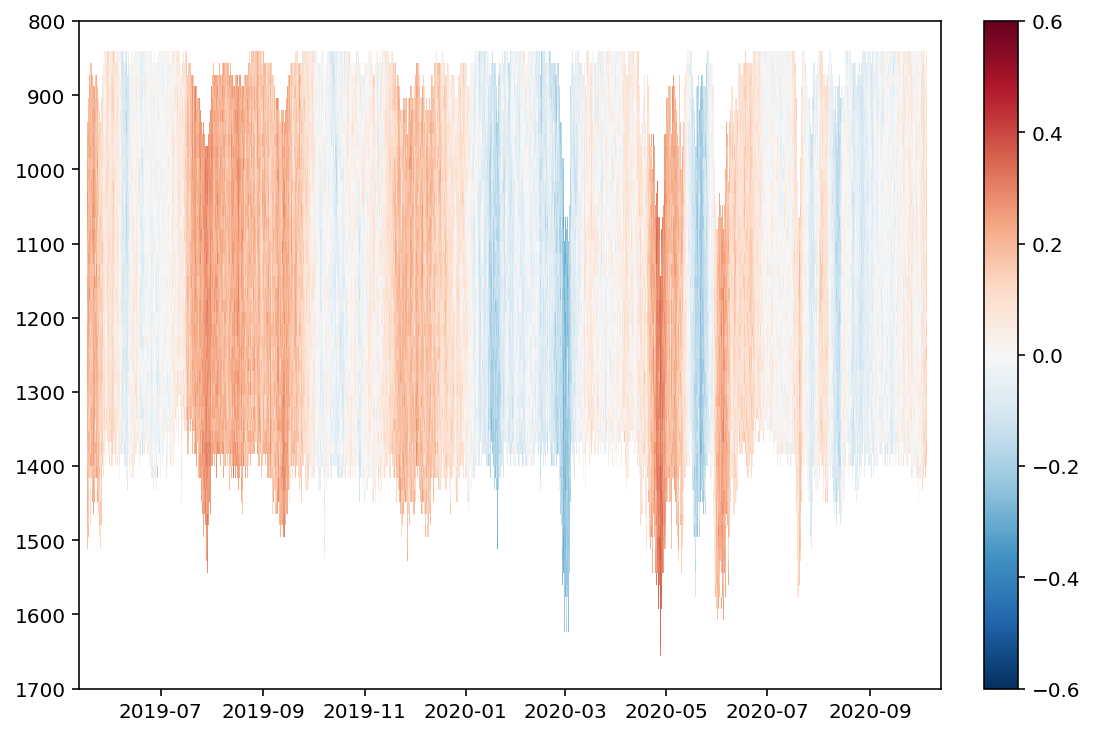

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 5),
                       constrained_layout=True)
h = ax.pcolormesh(time, z, u, cmap='RdBu_r', vmin=-0.6, vmax=0.6)
plt.colorbar(h)
ax.set(ylim=(1700, 800))